Primeiramente para aplicarmos o método de Mínimos Quadrados, é necessário termos alguns pontos e o modelo da equação.

A questão nos dá os pontos em **Tempo**, **Temperatura**. (Para facilitar o pensamento irei colocar o tempo em minutos)

Logo temos dados do problema os pontos **(0, 34)**, **(90, 30)**, **(150, 25)**

E temos também o nosso modelo de equação dado pela Lei de Resfriamento de Newton:

$T\:=\:\left(T_0-T_f\right)e^{-kt}+T_f$

Como esta equação é exponencial, precisamos linearizar ela, e depois aplicar mínimos quadrados na função linear.

Antes vamo substituir os valores, pelos que foram dados no problema:

$T_0 = 34$

$T_f = 20$

E então ficamos com:

$T\:=\:14e^{-kt}+20$

Agora podemos linearizar, primeiros isolamos o $e^{-kt}$

$\frac{T\:+20}{14}=\:e^{-kt}$

Logo após podemos aplicar o $ln()$ em ambos os lados para retirarmos o $-kt$ do expoente

$\ln \left(\frac{T\:+20}{14}\right)=\:\ln \left(e^{-kt}\right)$

E retirando o $-kt$ do expoente, possível pois o log e o expoente tem a mesma base, ficamos com:

$\ln \left(\frac{T\:+20}{14}\right)=-kt$

Nosso $y$ será dado por $ln \left(\frac{T\:+20}{14}\right)$ e iremos retirar o negativo do lado direito para que o nosso $x$ seja igual a ele mesmo $x=x$ (isso implicará em termos um $k$ negativo apenas)



In [157]:
x = [0, 90, 150]
y = [34.0, 30.0, 25.0]

x_barra = x
y_barra = [log((y[k]-20)/14) for k = 1:3];

Iremos usar nossa fórmula de mínimos quadrados para descobrir nosso $k$

$k=\frac{n\cdot \sum xy\:-\:\sum x\:\sum y\:}{n\:\cdot \sum x^2\:-\left(\sum x\right)^2}$

Para isso vamos definir nossos arrays de $x*y$ e $x^2$

In [158]:
xy = [x_barra[i] * y_barra[i] for i = 1:3]
x_quadrado = [x_barra[j]^2 for j = 1:3];

Aplicando as somas na fórmula

In [159]:
k = ( ((size(x_barra)[1] * sum(xy)) - (sum(x_barra) * sum(y_barra))) 
        / ((size(x_barra)[1] * sum(x_quadrado) - (sum(x_barra)^2) )) )

-0.006617375576218703

Com o valor de $k$, vamos colocá-lo na função

In [161]:
f(x) = 14*ℯ^(-0.006617375576218703x)+20

f (generic function with 1 method)

Vamos plotar a função para vermos nosso resultado

In [162]:
using Plots

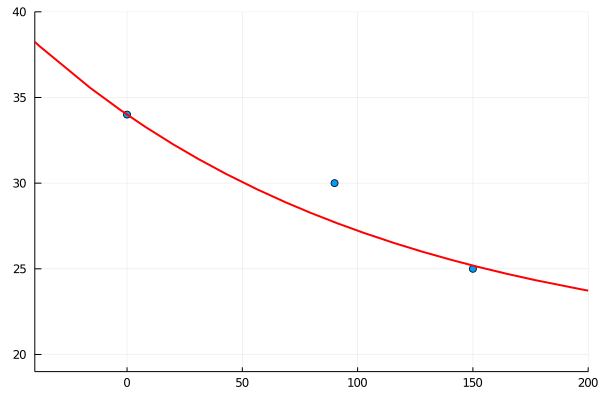

In [164]:
scatter(x, y, leg=false)
plot!(f, -40, 200, c=:red, lw=2)
xlims!(-40, 200)
ylims!(19,40)

Para sabermos em qual momento o corpo estava 37º é só descobrirmos pra qual $x$ temos $y = 37$ 

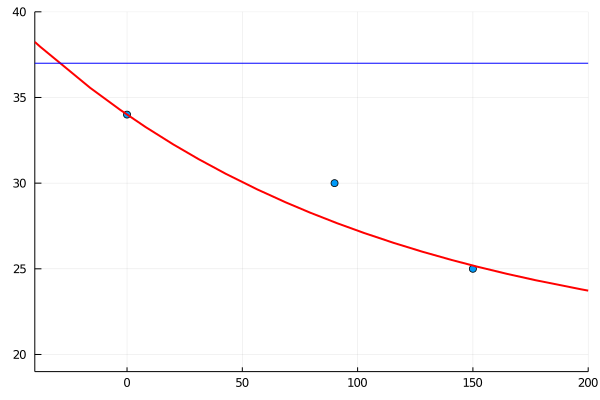

In [165]:
T(x) = 37
plot!(T, -40, 200, c=:blue, lw=1)

Temos que em $x = -29.3404$ o valor de $y ≈ 37$

In [180]:
f(-29.3404)

37.000007342565596

Ou seja passaram **29 minutos** e alguns segundos desde o assassinato até o momento que a polícia chegou ao local.

Logo temos que o horário que aconteceu o assassinato foi próximo de
## 14h31min